In [50]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import sklearn.cluster as skc
from scipy.spatial.distance import cdist
import sys

from utils import utils

In [51]:
RANGE = 10
COLORS = [
    'red',
    'blue',
    'green',
    'cyan',
    'magenta',
    'yellow',
    'purple',
    'orange',
    'lime',
    'pink',
    'yellowgreen',
    'brown',
    'coral',
    'indigo',
    'ivory',
    'khaki',
    'lavender',
    'lightblue',
    'lightgreen',
    'maroon',
    'orchid',
    'tan',
    'aqua',
    'black',
    'white'
]

In [52]:
# Read and shuffle data.
df = pd.read_csv('mission_1.csv')

data = []
for _, d in df.iterrows():
    data.append(d.tolist()[1:])
data = np.array(data)
np.random.shuffle(data)

In [53]:
# Separate actions and query information.
query_attributes = data[:, :-1]
actions = data[:, -1].astype(np.int32)

In [54]:
test = query_attributes[-1]
data = query_attributes[:-1]

In [55]:
data_norm = utils.min_max_normalization(query_attributes)

In [ ]:
# ONLY FOR 3D GRAPH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_norm[:, 0], data_norm[:, 1], data_norm[:, 2], c='b', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

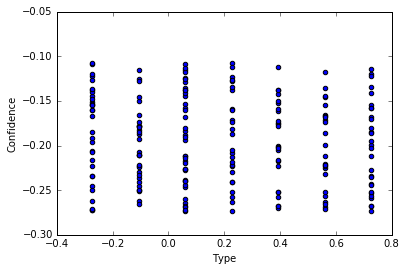

In [56]:
# ONLY FOR 2D GRAPH
plt.scatter(data_norm[:, 0], data_norm[:, 1], marker = "o")
plt.xlabel('Type')
plt.ylabel('Confidence')

In [57]:
# Elbow method for k means
cluster_inertia = []
for k in xrange(1, RANGE):
    k_means_model = skc.KMeans(n_clusters=k).fit(data)
    cluster_inertia.append(k_means_model.inertia_)

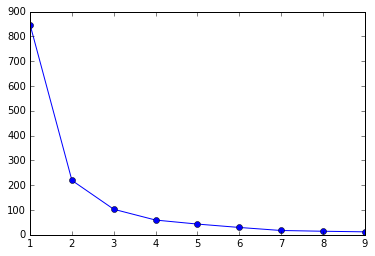

In [58]:
plt.plot(xrange(1, RANGE), cluster_inertia, marker='o')

In [70]:
k_means_model = skc.KMeans(n_clusters=3).fit(data_norm)
#k_means_model = skc.MiniBatchKMeans(n_clusters=3).fit(data_norm)
#k_means_model = skc.AffinityPropagation(preference=-50).fit(data_norm)
#bandwidth = skc.estimate_bandwidth(data_norm, quantile=0.2, n_samples=50)
#k_means_model = skc.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#k_means_model = skc.DBSCAN(eps=0.011, min_samples=4).fit(data_norm)

centroids = k_means_model.cluster_centers_
labels = k_means_model.labels_

print(centroids)
print(labels)

[[-0.19003979 -0.1921141 ]
 [ 0.56850721 -0.19931877]
 [ 0.12561677 -0.19135691]]
[2 1 2 2 0 1 0 1 1 2 0 2 0 0 0 2 0 1 1 1 1 1 1 1 1 2 0 1 0 1 2 2 0 2 2 0 2
 0 1 0 0 0 1 0 1 1 0 1 2 2 1 2 1 2 2 0 0 1 1 1 1 2 0 0 1 1 1 1 0 2 1 0 1 2
 2 1 2 1 1 1 0 0 0 2 1 0 1 2 0 1 2 1 0 2 2 1 2 2 2 1 2 1 2 0 1 2 1 2 2 2 1
 0 0 2 0 2 1 0 2 2 1 0 1 1 0 2 2 1 1 2 1 1 1 2 2 1 1 0 0 0 1 1 2 0 2 1 0 1
 1 0 0 1 2 2 2 0 1 0 0 2 0 1 1 0 2 1 1 2 0 1 0 2 2 0 2 0 1 1 2 2 1 0 1 0 0
 0 0 0 2 0 0 0 1 2 2 0 0 2 2 1 2 1 1 0 1 1 2 2]


In [ ]:
# ONLY FOR 3D GRAPH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in xrange(data_norm.shape[0]):
    ax.scatter(data_norm[i][0], data_norm[i][1], data_norm[i][2], c=COLORS[labels[i]], marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

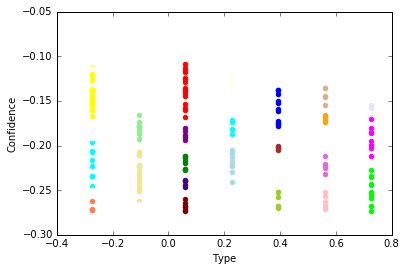

In [68]:
# ONLY FOR 2D GRAPH
for i in xrange(data_norm.shape[0]):
    plt.scatter(data_norm[:, 0][i], data_norm[:, 1][i], color=COLORS[labels[i]])

#plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", s=50, zorder = 10)
plt.xlabel('Type')
plt.ylabel('Confidence')

In [49]:
# random prototype from cluster
max_label = 0
for i in labels:
    if i > max_label:
        max_label = i

current_label = 0
for i in xrange(max_label+1):
    labels[i]

In [61]:
# get prototype from cluster based on centroid
centroid_shape = centroids.shape[0]

prototypes = np.zeros(centroid_shape, dtype=np.int32)
distances = np.zeros(centroid_shape)

for i in xrange(centroid_shape):
    for j in xrange(labels.shape[0]):
        if labels[j] == i:
            dist = np.linalg.norm(centroids[i] - data_norm[j])
            
            if not prototypes[i]:
                prototypes[i] = j
                distances[i] = dist
                continue
                
            if dist < distances[i]:
                prototypes[i] = j
                distances[i] = dist
                
print(prototypes)
print(distances)

[147 197 195]
[ 0.00854717  0.06566068  0.08333418]


In [62]:
# print prototype data
for p in prototypes:
    print(data[p])

[ 5.          0.44464411]
[ 2.          0.49650559]
[ 1.          0.48530192]


### The robot [action] when presented with a [type] query with a confidence [confidence]%.
### Which action would you prefer for the robot to make next time:
### 1 - Same action
### 2, 3 - Next two

In [63]:
def display_question(survey, action_taken):
    sys.stdout.write('The robot ')
    if action_taken == 0:
        sys.stdout.write('was fully autonomous')
    elif action_taken == 1:
        sys.stdout.write('stopped and waited for your input')
    elif action_taken == 2:
        sys.stdout.write('continued its task and asked for your answer later')

    sys.stdout.write(' when presented with a ')

    if int(survey[0]) == 0:
        sys.stdout.write('visual')
    elif int(survey[0]) == 1:
        sys.stdout.write('tagging')
    elif int(survey[0]) == 2:
        sys.stdout.write('path')
    elif int(survey[0]) == 3:
        sys.stdout.write('communication')
    elif int(survey[0]) == 4:
        sys.stdout.write('robot health')
    elif int(survey[0]) == 5:
        sys.stdout.write('audio')
    elif int(survey[0]) == 6:
        sys.stdout.write('task')

    sys.stdout.write(' query with a confidence of ')

    sys.stdout.write('{}%\n'.format(int(survey[1]*100)))

In [64]:
def survey_func(survey, action_taken):
    display_question(survey, action_taken)
    
    sys.stdout.write('Which action would you prefer for the robot to make next time:\n')
    sys.stdout.write('1 - Same action\n')
    if action_taken == 0:
        sys.stdout.write('2 - Stop and ask\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 0
        elif result == 2:
            return 1
        elif result == 3:
            return 2
    elif action_taken == 1:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 1
        elif result == 2:
            return 0
        elif result == 3:
            return 2
    elif action_taken == 2:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Stop and ask\n')
        
        result = input()
        if result == 1:
            return 2
        elif result == 2:
            return 0
        elif result == 3:
            return 1

In [65]:
cluster_labels = dict()
for p in prototypes:
    preferred_action = survey_func(data[p], actions[p])
    cluster_labels[labels[p]] = preferred_action

The robot stopped and waited for your input when presented with a audio query with a confidence of 44%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
1
The robot stopped and waited for your input when presented with a path query with a confidence of 49%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
3
The robot stopped and waited for your input when presented with a tagging query with a confidence of 48%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
2


In [17]:
cluster_labels

{0: 1, 1: 0, 2: 2}

In [72]:
test = test.reshape(1, 2)
test

array([[ 2.        ,  0.28325014]])

In [73]:
for t in test:
    c_predict = k_means_model.predict([t])[0]
    action = cluster_labels[c_predict]
    display_question(t, action)
    '''
    if t[-1] != action:
        print('Before:')
        display_question(t, action)
        t[-1] = action
        print('After:')
        display_question(t, action)
        print()
    '''

The robot continued its task and asked for your answer later when presented with a path query with a confidence of 28%
